In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

%matplotlib inline
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
from pickle import dump
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


# Data processing

In [3]:
# TEST1_DIR = 'test1'
TRAIN_DIR = 'train'
INPUT_DIR = '../input/dogs-vs-cats'
OUTPUT_DIR = '/output/'

In [4]:
import zipfile

zip_files = ['train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

train unzipped


In [5]:
file_names = os.listdir(TRAIN_DIR)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [6]:
filenames = os.listdir(TRAIN_DIR)
filenames[:5]

['cat.7719.jpg',
 'dog.1145.jpg',
 'dog.11615.jpg',
 'dog.10463.jpg',
 'dog.11892.jpg']

In [7]:
labels = [1 if filename.startswith('dog') else 0 for filename in filenames]

labels[:5]

[0, 1, 1, 1, 1]

In [8]:
df = pd.DataFrame({
    'filename': filenames,
    'category': labels
})

df.head()

,filename,category
0,cat.7719.jpg,0
1,dog.1145.jpg,1
2,dog.11615.jpg,1
3,dog.10463.jpg,1
4,dog.11892.jpg,1


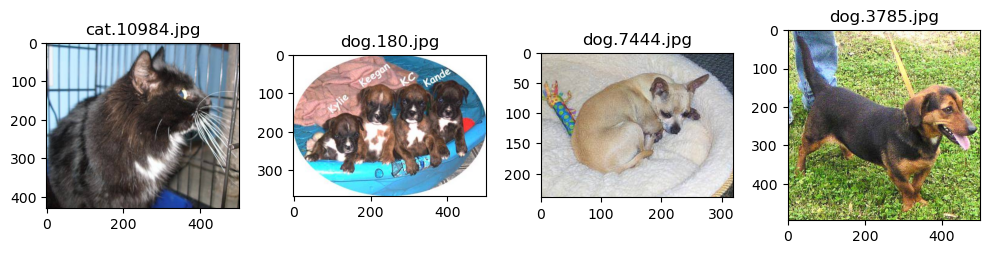

In [9]:
random_images = random.sample(list(df['filename']), 4)
fig, axes = plt.subplots(1, 4, figsize=(10, 8))
axes = axes.ravel()

for i, filename in enumerate(random_images):
    image = mpimg.imread("{}/{}".format(TRAIN_DIR, filename))
    axes[i].imshow(image)
    axes[i].set_title((filename))
    axes[i].axis('on')

plt.tight_layout()
plt.show()

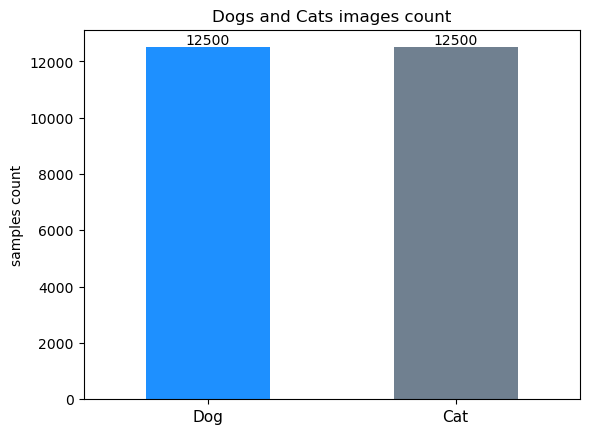

In [10]:
ax = df.category.value_counts().plot.bar(color=['dodgerblue', 'slategray'])
plt.title('Dogs and Cats images count')
plt.ylabel('samples count')

ax.set_xticklabels(['Dog', 'Cat'], rotation=0, fontsize=11)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [11]:
def load_images_from_dir(dir_location, filenames):
    return [np.array(Image.open('{}/{}'.format(dir_location, filename)).resize((64, 64))) for filename in filenames]

images = np.array(load_images_from_dir(TRAIN_DIR, filenames))
images.shape

(25000, 64, 64, 3)

[24110 19924   429 11710]
24110    0
19924    0
429      0
11710    0
Name: category, dtype: int64


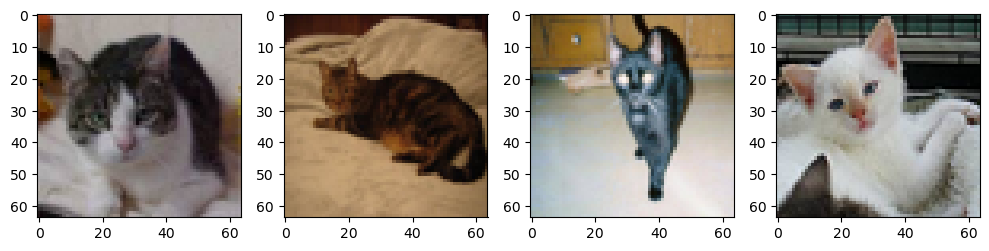

In [12]:
random_indices = np.random.choice(images.shape[0], size=4, replace=False)
print(random_indices)
random_images = images[random_indices]
labels = df['category']
label = labels[random_indices]
print(label)
fig, axes = plt.subplots(1, 4,  figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i])
    ax.axis('on')

plt.tight_layout()

plt.show()

## Split this dataset into 10,000 images for training and 5,000 images for testing.

In [13]:
from sklearn.model_selection import train_test_split
# 获取标签数据
labels = df['category']

# 分割数据集为训练集和测试集
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=5000, random_state=42, stratify=labels)

# 选择前10000个样本作为训练集
train_images1 = train_images[:10000]
train_labels1 = train_labels[:10000]

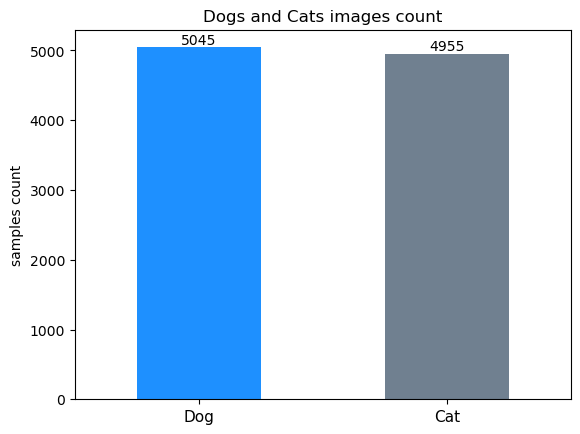

In [14]:
ax = train_labels1.value_counts().plot.bar(color=['dodgerblue', 'slategray'])
plt.title('Dogs and Cats images count')
plt.ylabel('samples count')
ax.set_xticklabels(['Dog', 'Cat'], rotation=0, fontsize=11)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


# Models

## DT

In [15]:
train_images1.shape

(10000, 64, 64, 3)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

h, w, d = train_images1[0].shape
images_resized = np.array([np.reshape(img, (w*h*d)) for img in train_images1])
test_images_resized = np.array([np.reshape(img, (w*h*d)) for img in test_images])

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(images_resized, train_labels1)

pred = clf.predict(test_images_resized)

DT_accuracy = accuracy_score(test_labels, pred)
DT_report = classification_report(test_labels, pred)
DT_matrix = confusion_matrix(test_labels, pred)

print(f"Accuracy: {DT_accuracy}")
print("Classification Report:")
print(DT_report)
print("Confusion Matrix:")
print(DT_matrix)


Accuracy: 0.5762
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.48      0.53      2500
           1       0.56      0.67      0.61      2500

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.57      5000
weighted avg       0.58      0.58      0.57      5000

Confusion Matrix:
[[1208 1292]
 [ 827 1673]]


## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

h, w, d = train_images1[0].shape
images_resized = np.array([np.reshape(img, (w*h*d)) for img in train_images1])
test_images_resized = np.array([np.reshape(img, (w*h*d)) for img in test_images])


knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(images_resized, train_labels1)


pred = knn.predict(test_images_resized)


KNN_accuracy = accuracy_score(test_labels, pred)
KNN_report = classification_report(test_labels, pred)
KNN_matrix = confusion_matrix(test_labels, pred)

print(f"Accuracy: {KNN_accuracy}")
print("Classification Report:")
print(KNN_report)
print("Confusion Matrix:")
print(KNN_matrix)


Accuracy: 0.5736
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      2500
           1       0.59      0.47      0.53      2500

    accuracy                           0.57      5000
   macro avg       0.58      0.57      0.57      5000
weighted avg       0.58      0.57      0.57      5000

Confusion Matrix:
[[1684  816]
 [1316 1184]]


## SGD

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

h, w, d = train_images1[0].shape
images_resized = np.array([np.reshape(img, (w*h*d)) for img in train_images1])
test_images_resized = np.array([np.reshape(img, (w*h*d)) for img in test_images])


sgd = SGDClassifier()
sgd.fit(images_resized, train_labels1)


pred = sgd.predict(test_images_resized)


SGD_accuracy = accuracy_score(test_labels, pred)
SGD_report = classification_report(test_labels, pred)
SGD_matrix = confusion_matrix(test_labels, pred)

print(f"Accuracy: {SGD_accuracy}")
print("Classification Report:")
print(SGD_report)
print("Confusion Matrix:")
print(SGD_matrix)


Accuracy: 0.5416
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.87      0.65      2500
           1       0.62      0.22      0.32      2500

    accuracy                           0.54      5000
   macro avg       0.57      0.54      0.49      5000
weighted avg       0.57      0.54      0.49      5000

Confusion Matrix:
[[2169  331]
 [1961  539]]


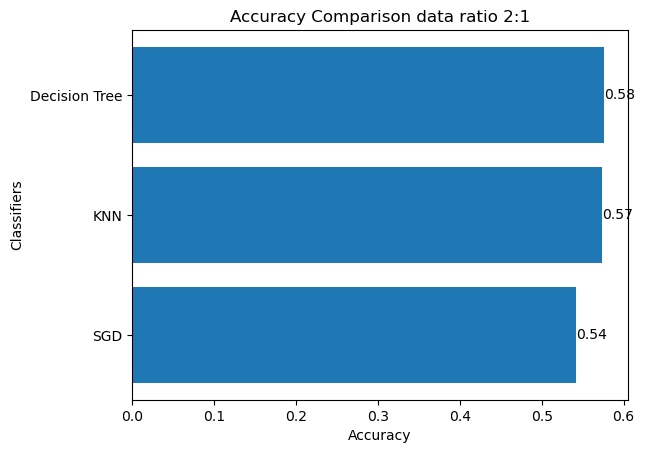

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


accuracy_scores = [DT_accuracy, KNN_accuracy, SGD_accuracy]
classifiers = ['Decision Tree', 'KNN', 'SGD']
accuracy_scores_sorted = sorted(accuracy_scores)
classifiers_sorted = [x for _, x in sorted(zip(accuracy_scores, classifiers))]

plt.barh(classifiers_sorted, accuracy_scores_sorted)
plt.title('Accuracy Comparison data ratio 2:1')
plt.xlabel('Accuracy')
plt.ylabel('Classifiers')

for i, v in enumerate(accuracy_scores_sorted):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center')

plt.show()

In [20]:
print("Decision Tree Report:")
print(DT_report)
print("KNN Report:")
print(KNN_report)
print("SGD Report:")
print(SGD_report)

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.59      0.48      0.53      2500
           1       0.56      0.67      0.61      2500

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.57      5000
weighted avg       0.58      0.58      0.57      5000

KNN Report:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      2500
           1       0.59      0.47      0.53      2500

    accuracy                           0.57      5000
   macro avg       0.58      0.57      0.57      5000
weighted avg       0.58      0.57      0.57      5000

SGD Report:
              precision    recall  f1-score   support

           0       0.53      0.87      0.65      2500
           1       0.62      0.22      0.32      2500

    accuracy                           0.54      5000
   macro avg       0.57      0.54      0.49      5000
weighted avg       0.57     

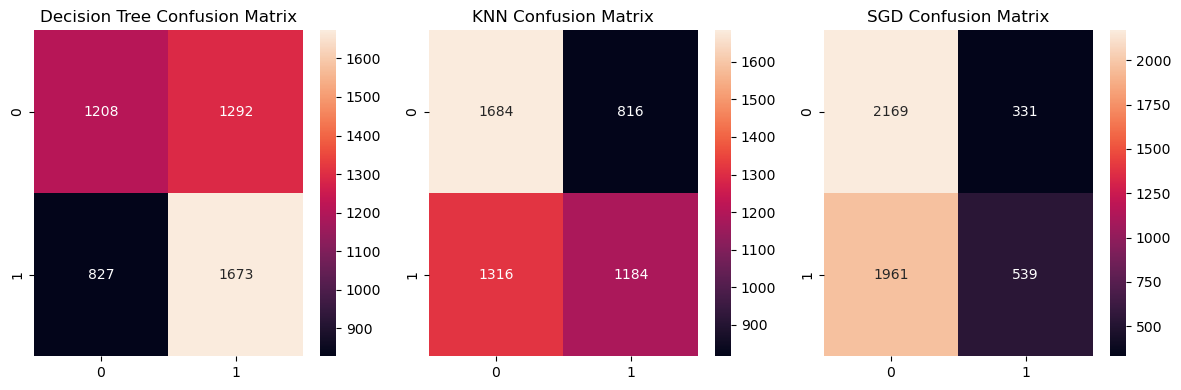

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.heatmap(DT_matrix, annot=True, fmt='d', ax=axes[0])
sns.heatmap(KNN_matrix, annot=True, fmt='d', ax=axes[1])
sns.heatmap(SGD_matrix, annot=True, fmt='d', ax=axes[2])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('KNN Confusion Matrix')
axes[2].set_title('SGD Confusion Matrix')
plt.tight_layout()
plt.show()

## double the number of training images to 20,000

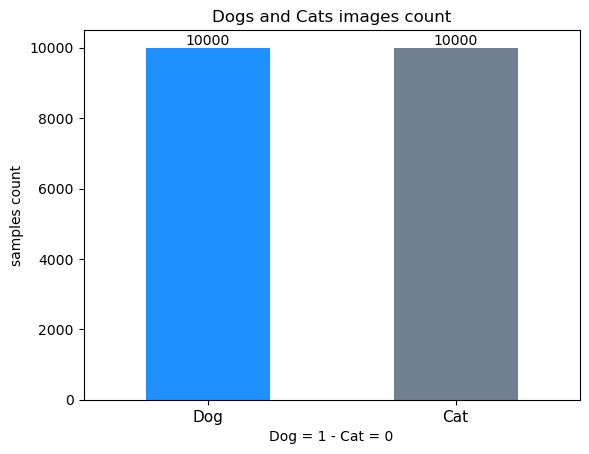

In [22]:
ax = train_labels.value_counts().plot.bar(color=['dodgerblue', 'slategray'])
plt.title('Dogs and Cats images count')
plt.xlabel('Dog = 1 - Cat = 0')
plt.ylabel('samples count')
ax.set_xticklabels(['Dog', 'Cat'], rotation=0, fontsize=11)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [23]:
################## DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

h, w, d = train_images1[0].shape
images_resized = np.array([np.reshape(img, (w*h*d)) for img in train_images])
test_images_resized = np.array([np.reshape(img, (w*h*d)) for img in test_images])

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(images_resized, train_labels)

pred = clf.predict(test_images_resized)

DT_accuracy2 = accuracy_score(test_labels, pred)
DT_report2 = classification_report(test_labels, pred)
DT_matrix2 = confusion_matrix(test_labels, pred)

print(f"Accuracy: {DT_accuracy2}")
print("Classification Report:")
print(DT_report2)
print("Confusion Matrix:")
print(DT_matrix2)
print()
####################### KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

h, w, d = train_images1[0].shape
images_resized = np.array([np.reshape(img, (w*h*d)) for img in train_images])
test_images_resized = np.array([np.reshape(img, (w*h*d)) for img in test_images])


knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(images_resized, train_labels)


pred = knn.predict(test_images_resized)


KNN_accuracy2 = accuracy_score(test_labels, pred)
KNN_report2 = classification_report(test_labels, pred)
KNN_matrix2 = confusion_matrix(test_labels, pred)

print(f"Accuracy: {KNN_accuracy2}")
print("Classification Report:")
print(KNN_report2)
print("Confusion Matrix:")
print(KNN_matrix2)
print()
###################### SGD
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

h, w, d = train_images1[0].shape
images_resized = np.array([np.reshape(img, (w*h*d)) for img in train_images])
test_images_resized = np.array([np.reshape(img, (w*h*d)) for img in test_images])


sgd = SGDClassifier()
sgd.fit(images_resized, train_labels)


pred = sgd.predict(test_images_resized)


SGD_accuracy2 = accuracy_score(test_labels, pred)
SGD_report2 = classification_report(test_labels, pred)
SGD_matrix2 = confusion_matrix(test_labels, pred)

print(f"Accuracy: {SGD_accuracy2}")
print("Classification Report:")
print(SGD_report2)
print("Confusion Matrix:")
print(SGD_matrix2)

Accuracy: 0.5768
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      2500
           1       0.57      0.63      0.60      2500

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

Confusion Matrix:
[[1311 1189]
 [ 927 1573]]

Accuracy: 0.5802
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.70      0.63      2500
           1       0.61      0.46      0.52      2500

    accuracy                           0.58      5000
   macro avg       0.59      0.58      0.57      5000
weighted avg       0.59      0.58      0.57      5000

Confusion Matrix:
[[1754  746]
 [1353 1147]]

Accuracy: 0.5132
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.06      0.11      2500
           1       0.51  

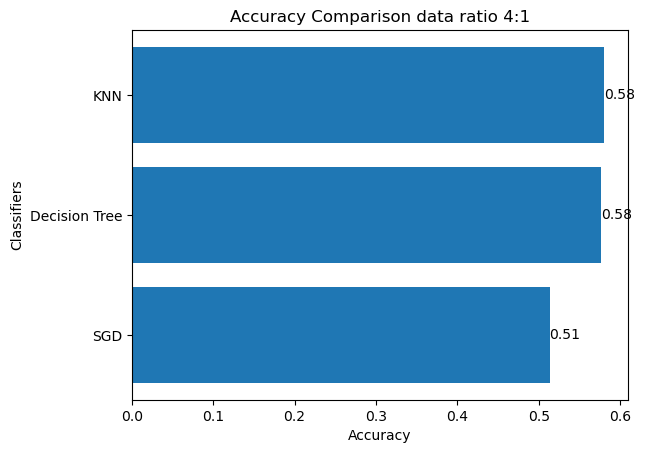

In [34]:
accuracy_scores = [DT_accuracy2, KNN_accuracy2, SGD_accuracy2]
classifiers = ['Decision Tree', 'KNN', 'SGD']
accuracy_scores_sorted = sorted(accuracy_scores)
classifiers_sorted = [x for _, x in sorted(zip(accuracy_scores, classifiers))]

plt.barh(classifiers_sorted, accuracy_scores_sorted)
plt.title('Accuracy Comparison data ratio 4:1')
plt.xlabel('Accuracy')
plt.ylabel('Classifiers')

for i, v in enumerate(accuracy_scores_sorted):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center')

plt.show()

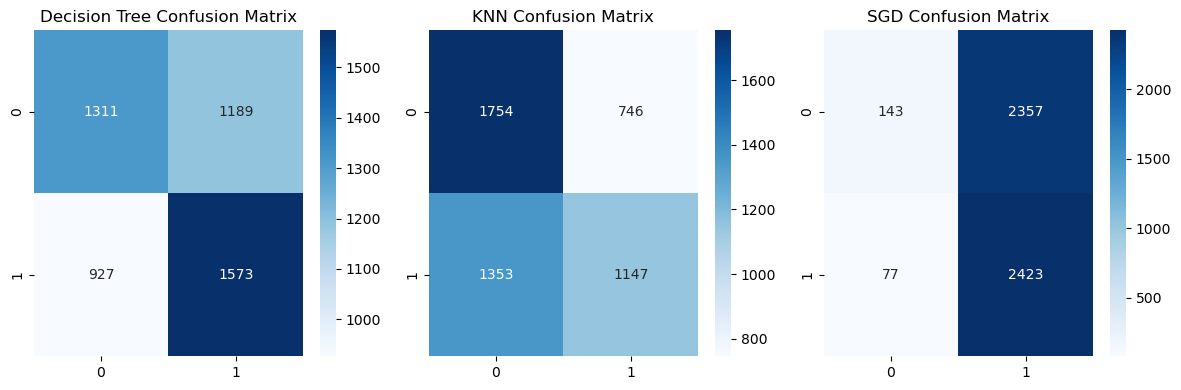

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
cmap = 'Blues'

sns.heatmap(DT_matrix2, annot=True, fmt='d', ax=axes[0], cmap=cmap)
sns.heatmap(KNN_matrix2, annot=True, fmt='d', ax=axes[1], cmap=cmap)
sns.heatmap(SGD_matrix2, annot=True, fmt='d', ax=axes[2], cmap=cmap)

axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('KNN Confusion Matrix')
axes[2].set_title('SGD Confusion Matrix')

plt.tight_layout()
plt.show()


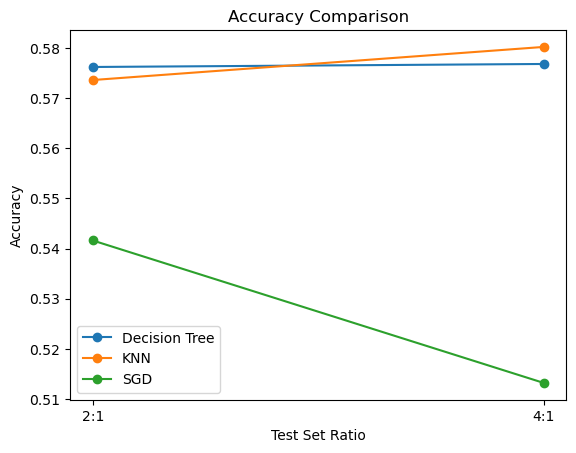

In [28]:
# 定义测试集比例和对应的准确率
test_ratios = ['2:1', '4:1']
DT_accuracies = [DT_accuracy, DT_accuracy2]
KNN_accuracies = [KNN_accuracy, KNN_accuracy2]
SGD_accuracies = [SGD_accuracy, SGD_accuracy2]

# 绘制折线图
plt.plot(test_ratios, DT_accuracies, marker='o', label='Decision Tree')
plt.plot(test_ratios, KNN_accuracies, marker='o', label='KNN')
plt.plot(test_ratios, SGD_accuracies, marker='o', label='SGD')
plt.xlabel('Test Set Ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()


# Evaluation

### When training 10000 images of data, the prediction results of DT, KNN and SGD are as follows:

|DT|KNN|SGD|
|:--:|:--:|:--:|
|![16884751850951688475181624.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16884751850951688475181624.png)|![16884750707601688475052596.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16884750707601688475052596.png)|![16884751307571688475081858.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16884751307571688475081858.png)|
***
### The accuracy is as follows:

We can see that the accuracy of the three methods is between 0.5 and 0.6, and the accuracy of DT method is higher than that of the other two methods. But none of the three methods works very well.

|Models|Acc|
|--|--|
|DT|0.5762|
|KNN|0.5736|
|SGD|0.5416|

Based on the provided performance results of the classifiers, we can draw the following analysis:

- Decision Tree (DT) classifier has an accuracy of 0.5762, slightly higher than the KNN and SGD classifiers. However, from the classification report, it can be observed that the DT classifier has a higher recall for the positive class (1) (0.67), but a lower recall for the negative class (0) (0.48). This suggests that the DT classifier performs relatively well in identifying the positive class but has some issues in identifying the negative class.
- K-Nearest Neighbors (KNN) classifier has an accuracy of 0.5736, close to the accuracy of the DT classifier. The classification report of the KNN classifier shows that its recall for the positive class (0.47) is slightly lower than that of the DT classifier, but its recall for the negative class (0.67) is slightly higher. The confusion matrix of the KNN classifier also indicates a significant number of false positives and false negatives, which may affect its performance.
- Stochastic Gradient Descent (SGD) classifier has the lowest accuracy among the three classifiers, with an accuracy of 0.5416. The classification report and confusion matrix of the SGD classifier demonstrate its poor performance in terms of recall for the positive class (0.22) and a high number of false positives and false negatives. This suggests that the SGD classifier performs relatively poorly on this dataset.

the DT classifier has a certain advantage in the recall for the positive class, while the KNN classifier has a slight advantage in the recall for the negative class. Meanwhile, the SGD classifier exhibits low recall for the positive class and overall poor performance. However, to comprehensively and accurately assess the performance of the classifiers, it is recommended to consider other metrics such as precision, F1-score, and conduct experiments like cross-validation to evaluate the robustness and stability of the classifiers on different datasets.


### When training 20000 images of data, the prediction results of DT, KNN and SGD are as follows:

|DT|KNN|SGD|
|:--:|:--:|:--:|
|![16884760907581688476073532.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16884760907581688476073532.png)|![16884761767571688476176159.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16884761767571688476176159.png)|![16884762027591688476202713.png](https://fastly.jsdelivr.net/gh/Chenjiangwen/ImageHostingService@main/pic/16884762027591688476202713.png)|
***
Based on the provided classification reports and confusion matrices, we can analyze the performance of each classifier as follows:

|Model|Accuracy|Precision (Class 0)|Recall (Class 0)|F1-score (Class 0)|Precision (Class 1)|Recall (Class 1)|F1-score (Class 1)|
|--|--|--|--|--|--|--|--|
|DT|0.5768|0.59|0.52|0.55|0.57|0.63|0.60|
|KNN|0.5802|0.56|0.70|0.63|0.61|0.46|0.52|
|SGD|0.5132|0.65|0.06|0.11|0.51|0.97|0.67|

Based on these results, we can make the following observations:

- DT and KNN have similar accuracies, with DT slightly lower at 57.68% and KNN slightly higher at 58.02%. SGD has the lowest accuracy at 51.32%.
- KNN shows a higher precision and recall for class 0 compared to DT, indicating that it performs better at correctly classifying class 0 instances. However, KNN has lower precision and recall for class 1 compared to DT.
- SGD has the highest precision for class 0 among the three classifiers but has very low recall for class 0. It also has the highest recall for class 1 but the lowest precision for class 1.

### The training data has increased, but the effect is not obvious.

- Data quality: The effectiveness of adding training data is closely related to the quality of the data. If the additional data is similar to the original dataset or contains similar patterns and features, the model may not learn new information from it. Additionally, if the added data has issues such as outliers or incorrect labeling, it can negatively impact the model.

- Imbalanced data distribution: If the data distribution is imbalanced, meaning some classes have very few samples, the model may prioritize optimizing for the majority classes, resulting in lower performance for the minority classes. But we have ensured that approximately equal numbers of images have been sampled from the "Dogs" class and the "Cats" class.

- Model complexity: There is a trade-off between model complexity and the amount of training data. When the training data is limited, using overly complex models may lead to overfitting. Increasing the training data can help alleviate overfitting to some extent, but if the model is already sufficiently simple, adding more data may have limited impact on improving performance.

- Feature selection and engineering: The predictive performance of a model depends not only on the amount of data but also on the selection and engineering of features. When adding training data, it is important to ensure that the new data contains informative features and to combine appropriate feature selection and engineering methods to extract and represent these features effectively.

- Hyperparameter tuning: After expanding the training data, the model's performance may be influenced by its hyperparameters. It may be necessary to further tune the hyperparameters to fully leverage the benefits of increased training data.

In conclusion, increasing the training data does not guarantee a significant performance improvement. In addition to increasing the data, other factors such as data quality, balanced data distribution, model complexity, feature selection and engineering, and hyperparameter tuning need to be considered to comprehensively optimize the model's performance.

We can see from the leaderboard that most people choose to use CNN for image classification prediction, and facts have proved that their method is indeed effective. Through the construction of convolution layer, pooling layer and full connection layer, CNN can effectively extract features from images and perform well in tasks such as image classification, target detection and image generation. Of course, through the processing of the original data and later parameter adjustment, the score of the traditional machine learning algorithm can also be improved to a certain extent, but the traditional machine learning algorithm may still be inferior to CNN in image processing.